In [1]:
from module.cleverhans_model import AttackModel
from module.utils import * 
from cleverhans.attacks import FastGradientMethod
%matplotlib inline

Using TensorFlow backend.


In [3]:
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name='resnetv1_50')

datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
X = M.preprocess_input(X)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(X,Y)
p.stop()
print(accuracy)

INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 18.23 s
0.9909091


In [4]:
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name='resnetv1_50')

datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
# X = M.preprocess_input(X)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(X,Y)
p.stop()
print(accuracy)

INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 18.32 s
0.009090909


In [2]:
import logging
logging.getLogger('tensorflow').setLevel(logging.WARNING)

In [3]:
attack_params = {"eps":32.0 / 255.0, "clip_min": -1.0, "clip_max": 1.0}

In [4]:
name = 'inception_v1'
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name=name)

datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
X = M.preprocess_input(X)

(_min, _max) = M._model._model['min_max']
attack_params = {"eps":32.0 / 255.0, "clip_min": _min, "clip_max": _max}
p=Profile(M.name+' attack')
Xadv, ypred, accuracy = M.attack(X,Y, FastGradientMethod,attack_params)
p.stop()
print("adv acc: ", accuracy)
print("L2 mean: ", M.L2(X,Xadv))

inception_v1 attack runs: 41.89 s
adv acc:  0.06363636
L2 mean:  0.1995596038733204


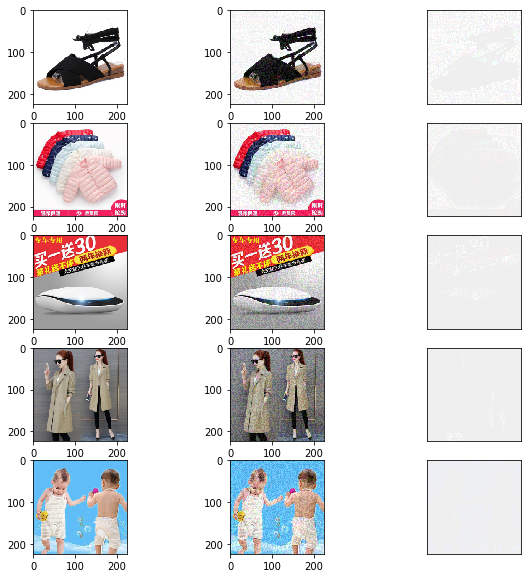

In [5]:
plot_images(M._model.undo_preprocess(X), M._model.undo_preprocess(Xadv))

In [6]:
# datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
# _,X,Y = next(datag)
# X = M.preprocess_input(X)
# p=Profile(M.name+' predict')
# ypred, accuracy = M.predict(X,Y)
# p.stop()
# print(accuracy)

For resnet and vgg, preprocess will substract mean value,  so cannot use to recovery image from Xadv
Two approach:
    1. no preprocess. cannot attack
    2. mapping to (0,1).  large L2

In [ ]:
name = 'resnetv1_50'
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name=name)

datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
# X = M.preprocess_input(X)
X = X -115

#Predict X
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(X,Y)
p.stop()
print("Orginal acc:", accuracy)

#Predict Xadv
(_min, _max) = M._model._model['min_max']
attack_params = {"eps":32.0 / 255.0, "clip_min": _min-115, "clip_max": _max-115}
p=Profile(M.name+' attack')
Xadv, ypred, accuracy = M.attack(X,Y, FastGradientMethod,attack_params)
p.stop()
print("adv acc: ", accuracy)

X = X+115
Xadv = Xadv+115
print("L2 mean: ", M.L2(X,Xadv))

INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 18.18 s
Orginal acc: 0.92727274


In [ ]:
Xadv = M.preprocess_input(Xadv)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(Xadv,Y)
p.stop()
print(accuracy)
Xadv = M.undo_preprocess(Xadv)

In [ ]:
plot_images(X, Xadv)

In [9]:
name = 'vgg_16'
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name=name)

datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
# X = M.preprocess_input(X)

#Predict X
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(X,Y)
p.stop()
print("Orginal acc:", accuracy)

#Predict Xadv
(_min, _max) = M._model._model['min_max']
attack_params = {"eps":32.0 / 255.0, "clip_min": _min, "clip_max": _max}
p=Profile(M.name+' attack')
Xadv, ypred, accuracy = M.attack(X,Y, FastGradientMethod,attack_params)
p.stop()
print("adv acc: ", accuracy)
print("L2 mean: ", M.L2(X,Xadv))

KeyboardInterrupt: 

In [ ]:
plot_images(X, Xadv)

In [3]:
(2,3)-(1,1)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'